In [32]:
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

df = pd.read_csv(url,header=None)
df.head(6)

#check the bottom 10 rows of data frame "df"

df.tail(10)

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df.columns = headers
df1 = df.replace('?','NaN')
df2 = df1.dropna(subset=['price'],axis = 0)
df.columns

#location = 'C:\Users\t5759dv\Documents\Faltu'
#df2.to_csv(location)


# Basic Insight of Dataset

df2.dtypes
df2.describe(include = 'all')

df2[['length','compression-ratio']].describe()

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [65]:
#Data Wrangling

import pandas as pd
import numpy as np

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv'
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df = pd.read_csv(url, names = headers)

df = df.replace('?',np.nan )
missing_data = df.isnull()

      
#miss = missing_data[missing_data[columns].values.any()]


#df.iloc[0,:]
miss = pd.DataFrame(missing_data.any())
miss_true = miss[miss[0]]
miss_index = miss_true.index.tolist()

'''
for i in missing_data.columns.tolist():
    if (i in miss_index):
        print(i)
        print(missing_data[i].value_counts())
        print()
'''

for i in df.columns.tolist():
    if ( i in miss_index and i not in ('num-of-doors','price')):
        df[i] = df[i].replace(np.nan,df[i].astype('float').mean())  
    elif( i == 'num-of-doors'):
        df[i] =df[i].replace(np.nan,'four' )
    elif( i == 'price'):
        df=df.dropna(subset=[i], axis = 0 )
    df = df.reset_index(drop = True)    

df['highway-L/100km'] = 235/df['highway-mpg']    
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()







,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,10.681818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845,8.392857
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045,9.400000
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485,10.217391
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470,8.703704


In [84]:
#Binning


import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df['horsepower'] = df['horsepower'].astype(int)
plt.hist(df['horsepower'])
plt.xlabel('horsepower')
plt.ylabel('count')
plt.title('Histogram of horsepower')
plt.show()

bins = np.linspace(df['horsepower'].min(), df['horsepower'].max(), 4)
group_name = ['low','medium','high']
df['horsepower_binned'] = pd.cut(df['horsepower'], bins, labels = group_name,include_lowest = True)

plt.hist(df['horsepower_binned'])
plt.show()

plt.bar(group_name,df['horsepower_binned'].value_counts())
plt.show()

dummy = pd.get_dummies(df['aspiration'])
dummy = dummy.rename(columns = {'std' : 'aspiration_std','turbo':'aspiration_turbo' })

df = pd.concat([df,dummy],axis=1)
df = df.dropna(subset = ['aspiration'],axis = 1)
df

ValueError: Cannot convert non-finite values (NA or inf) to integer

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


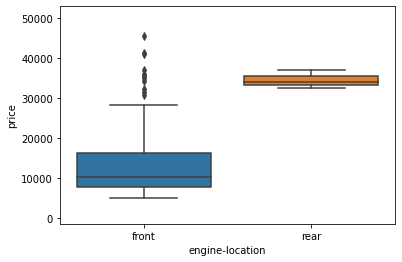

In [7]:
#Exploratory Data Analysis


%matplotlib inline
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(url)

print(df.dtypes)
df.corr()
df[['bore', 'stroke','compression-ratio' ,'horsepower']].corr()

sns.regplot(x = 'engine-size', y = 'price' , data=df)

df[['engine-size','price']].corr()

sns.boxplot(x = 'engine-location', y = 'price' , data=df )

df.describe()

